# أستكشاف بيانات الملف الأصلي 

# المرحلة التانية: المعالجة

# القيم المتطرفة: Z_score

## Necessary library loading 

In [1]:
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Initial phase, dataset load

## DataSet with Miss-data

In [2]:
BC= p.read_csv('bc_with_mis_90.csv')


In [3]:
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.0,23.0,0.8,3.4,1.0,2.0,1.0,...,3.4,4.60,13.4,500.0,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,400.0,22.0,0.7,NaN,9.6,3.0,7.0,...,4.4,5.00,12.5,NaN,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,450.0,27.0,0.6,3.5,9.3,11.0,17.0,...,5.1,4.46,12.5,456.0,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.0,15.0,1.1,4.2,8.5,13.0,1.0,...,3.1,4.33,13.8,600.0,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.0,2.0,1.0,3.0,8.0,7.0,13.0,...,4.2,4.13,1.7,543.0,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.0,28.0,0.7,5.9,9.5,63.0,23.0,...,3.9,5.23,11.3,288.0,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.0,32.0,0.8,10.2,8.8,82.0,23.0,...,4.8,4.57,13.2,249.0,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.0,15.0,0.6,11.4,8.1,22.0,15.0,...,4.4,4.32,11.1,249.0,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.0,29.0,0.9,10.9,8.2,51.0,17.0,...,4.5,4.41,12.9,293.0,13.0,254.0,147.5,3.15,107.5,1


## Dataset size

In [4]:
print(BC.shape)

(2437, 23)


In [5]:
BC.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.0,23.0,0.8,3.4,1.0,2.0,1.0,...,3.4,4.60,13.4,500.0,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,400.0,22.0,0.7,NaN,9.6,3.0,7.0,...,4.4,5.00,12.5,NaN,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,450.0,27.0,0.6,3.5,9.3,11.0,17.0,...,5.1,4.46,12.5,456.0,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.0,15.0,1.1,4.2,8.5,13.0,1.0,...,3.1,4.33,13.8,600.0,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.0,2.0,1.0,3.0,8.0,7.0,13.0,...,4.2,4.13,1.7,543.0,25.0,154.0,136.4,4.60,17.1,0


In [6]:
BC.tail()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
2432,1,30,Algatroon,70.0,28.0,0.7,5.9,9.5,63.0,23.0,...,3.9,5.23,11.3,288.0,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.0,32.0,0.8,10.2,8.8,82.0,23.0,...,4.8,4.57,13.2,249.0,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.0,15.0,0.6,11.4,8.1,22.0,15.0,...,4.4,4.32,11.1,249.0,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.0,29.0,0.9,10.9,8.2,51.0,17.0,...,4.5,4.41,12.9,293.0,13.0,254.0,147.5,3.15,107.5,1
2436,1,68,Sabha,90.0,29.0,0.6,5.3,8.5,83.0,20.0,...,3.4,4.42,11.0,199.0,15.0,254.0,142.3,3.23,107.5,1


## Info Data

In [7]:
BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 0 to 2436
Data columns (total 23 columns):
Sex          2437 non-null int64
Age          2437 non-null int64
Adress       2437 non-null object
FBS          2048 non-null float64
Urea         2275 non-null float64
Creatinin    2282 non-null float64
ALB          2148 non-null float64
T_Ca         2142 non-null float64
GPT          2140 non-null float64
GOT          2202 non-null float64
ALP          2126 non-null float64
CA15         2435 non-null float64
CEA          2435 non-null float64
WBC          2333 non-null float64
RBC          2369 non-null float64
HGB          2337 non-null float64
PLT          2258 non-null float64
ESR          2049 non-null float64
LDH          2052 non-null float64
Na           2011 non-null float64
K            2039 non-null float64
CL           1775 non-null float64
CLASS        2437 non-null int64
dtypes: float64(19), int64(3), object(1)
memory usage: 438.0+ KB


## Distributions values of all Features

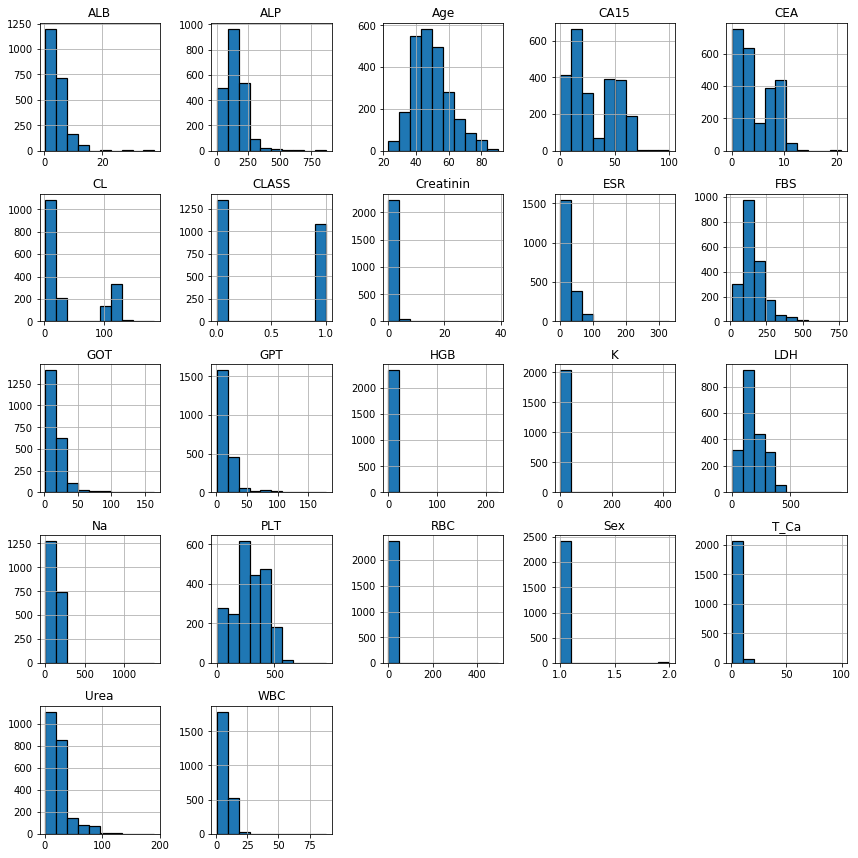

In [8]:

BC.hist(figsize=(12,12), edgecolor='black', linewidth=1.2)
plt.tight_layout( True )
plt.show()

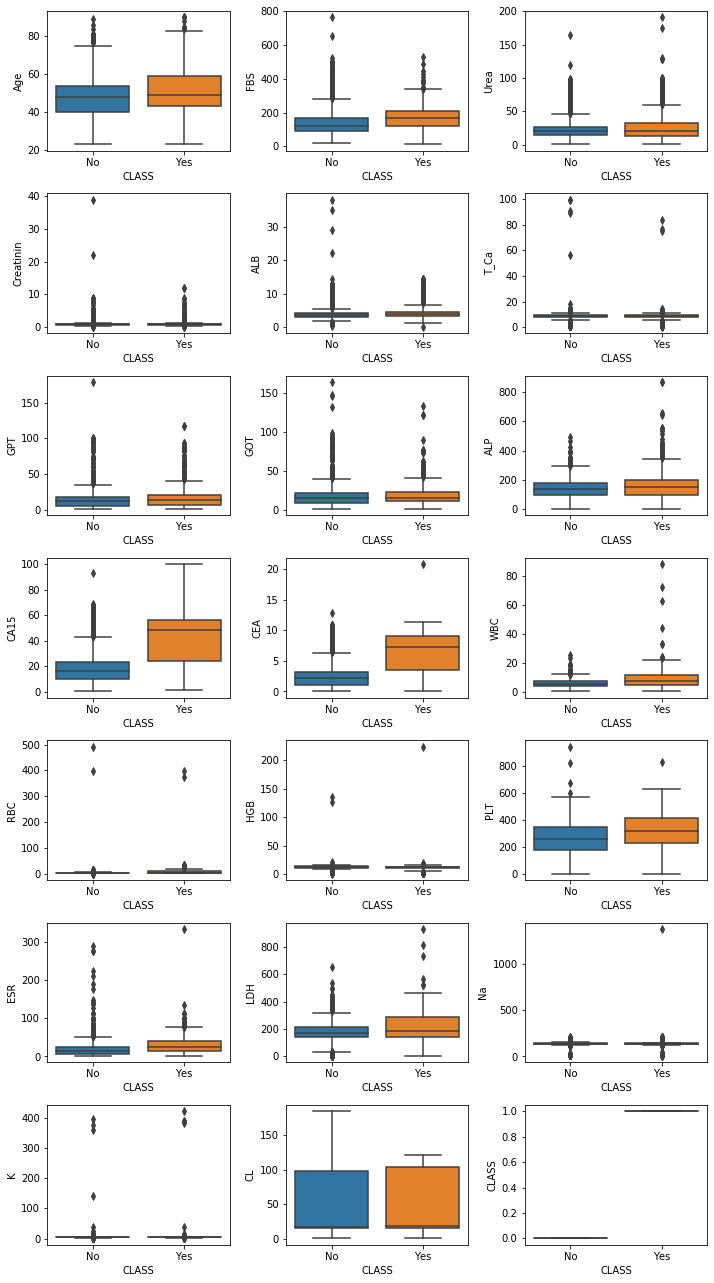

In [9]:
temp = BC[['Age','FBS','Urea','Creatinin','ALB','T_Ca','GPT','GOT','ALP','CA15','CEA',
                'WBC','RBC','HGB','PLT','ESR','LDH','Na','K','CL','CLASS']]
plt.figure(figsize=(10,20))
for i in range(21):
    plt.subplot(8,3,i+1)# لان عدد الخصائص المطلوبه 24 عنصر نقسمها
    plt.grid( False )
    sns.boxplot(x='CLASS', y=temp.columns[ i ], data=temp)
    plt.xticks([0,1],['No','Yes'], rotation=0 )
plt.tight_layout( True )
plt.show()

## Z-Score

In [10]:
BC.isnull().sum()

Sex            0
Age            0
Adress         0
FBS          389
Urea         162
Creatinin    155
ALB          289
T_Ca         295
GPT          297
GOT          235
ALP          311
CA15           2
CEA            2
WBC          104
RBC           68
HGB          100
PLT          179
ESR          388
LDH          385
Na           426
K            398
CL           662
CLASS          0
dtype: int64

In [11]:
#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["T_Ca"].fillna(BC["T_Ca"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.0,23.0,0.8,3.400000,1.0,2.0,1.0,...,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,400.0,22.0,0.7,4.461508,9.6,3.0,7.0,...,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,450.0,27.0,0.6,3.500000,9.3,11.0,17.0,...,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.0,15.0,1.1,4.200000,8.5,13.0,1.0,...,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.0,2.0,1.0,3.000000,8.0,7.0,13.0,...,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.0,28.0,0.7,5.900000,9.5,63.0,23.0,...,3.9,5.23,11.3,288.000000,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.0,32.0,0.8,10.200000,8.8,82.0,23.0,...,4.8,4.57,13.2,249.000000,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.0,15.0,0.6,11.400000,8.1,22.0,15.0,...,4.4,4.32,11.1,249.000000,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.0,29.0,0.9,10.900000,8.2,51.0,17.0,...,4.5,4.41,12.9,293.000000,13.0,254.0,147.5,3.15,107.5,1


In [12]:
BC.isnull().sum()

Sex          0
Age          0
Adress       0
FBS          0
Urea         0
Creatinin    0
ALB          0
T_Ca         0
GPT          0
GOT          0
ALP          0
CA15         0
CEA          0
WBC          0
RBC          0
HGB          0
PLT          0
ESR          0
LDH          0
Na           0
K            0
CL           0
CLASS        0
dtype: int64

In [13]:
BC["ZScore_FBS"] = (BC.FBS - BC.FBS.mean())/(BC.FBS.std())
BC["ZScore_Urea"] = (BC.Urea - BC.Urea.mean())/(BC.Urea.std())
BC["ZScore_creatinine"] = (BC.Creatinin - BC.Creatinin.mean())/(BC.Creatinin.std())
BC["ZScore_ALB"] = (BC.ALB - BC.ALB.mean())/(BC.ALB.std())
BC["ZScore_GPT"] = (BC.GPT - BC.GPT.mean())/(BC.GPT.std())
BC["ZScore_GOT"] = (BC.GOT - BC.GOT.mean())/(BC.GOT.std())
BC["ZScore_ALP"] = (BC.ALP - BC.ALP.mean())/(BC.ALP.std())
BC["ZScore_CA15"] = (BC.CA15 - BC.CA15.mean())/(BC.CA15.std())
BC["ZScore_CEA"] = (BC.CEA - BC.CEA.mean())/(BC.CEA.std())
BC["ZScore_WBC"] = (BC.WBC - BC.WBC.mean())/(BC.WBC.std())
BC["ZScore_RBC"] = (BC.RBC - BC.RBC.mean())/(BC.RBC.std())
BC["ZScore_HGB"] = (BC.HGB - BC.HGB.mean())/(BC.HGB.std())
BC["ZScore_PLT"] = (BC.PLT - BC.PLT.mean())/(BC.PLT.std())
BC["ZScore_ESR"] = (BC.ESR - BC.ESR.mean())/(BC.ESR.std())
BC["ZScore_LDH"] = (BC.LDH - BC.LDH.mean())/(BC.LDH.std())
BC["ZScore_Na"] = (BC.Na - BC.Na.mean())/(BC.Na.std())
BC["ZScore_CL"] = (BC.CL - BC.CL.mean())/(BC.CL.std())
BC["ZScore_K"] = (BC.K - BC.K.mean())/(BC.K.std())







BC.head()


,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,ZScore_CEA,ZScore_WBC,ZScore_RBC,ZScore_HGB,ZScore_PLT,ZScore_ESR,ZScore_LDH,ZScore_Na,ZScore_CL,ZScore_K
0,1,60,Tragan,200.0,23.0,0.8,3.400000,1.0,2.0,1.0,...,1.012341,-0.862799,-0.112863,0.358195,1.597128e+00,-0.016637,-0.383443,0.339961,-0.632988,-0.053713
1,1,53,Sabha,400.0,22.0,0.7,4.461508,9.6,3.0,7.0,...,0.980375,-0.639950,-0.089339,0.223714,2.097206e-15,-0.440516,0.815454,0.176674,-0.632988,-0.069035
2,1,50,Sabha,450.0,27.0,0.6,3.500000,9.3,11.0,17.0,...,1.221575,-0.483955,-0.121096,0.223714,1.272457e+00,-0.991560,-0.176360,0.208424,-0.707207,-0.069513
3,1,36,Obaree-center,300.0,15.0,1.1,4.200000,8.5,13.0,1.0,...,1.686539,-0.929654,-0.128742,0.417964,2.335017e+00,-0.440516,-0.514231,-2.630954,-1.127779,-0.077653
4,1,30,Obaree-center,345.0,2.0,1.0,3.000000,8.0,7.0,13.0,...,0.806013,-0.684520,-0.140504,-1.390054,1.914420e+00,-0.016637,-0.339846,0.144924,-0.687965,-0.048926


In [14]:
BC_FBS_outlier_Z = BC[(BC.ZScore_FBS>3) | (BC.ZScore_FBS<-3)]
BC_Urea_outlier_Z = BC[(BC.ZScore_Urea>3) | (BC.ZScore_Urea<-3)]
BC_creatinine_outlier_Z = BC[(BC.ZScore_creatinine>3) | (BC.ZScore_creatinine<-3)]
BC_ALB_outlier_Z = BC[(BC.ZScore_ALB>3) | (BC.ZScore_ALB<-3)]
BC_GPT_outlier_Z = BC[(BC.ZScore_GPT>3) | (BC.ZScore_GPT<-3)]
BC_GOT_outlier_Z = BC[(BC.ZScore_GOT>3) | (BC.ZScore_GOT<-3)]
BC_ALP_outlier_Z = BC[(BC.ZScore_ALP>3) | (BC.ZScore_ALP<-3)]
BC_CA15_outlier_Z = BC[(BC.ZScore_CA15>3) | (BC.ZScore_CA15<-3)]
BC_CEA_outlier_Z = BC[(BC.ZScore_CEA>3) | (BC.ZScore_CEA<-3)]
BC_WBC_outlier_Z = BC[(BC.ZScore_WBC>3) | (BC.ZScore_WBC<-3)]
BC_RBC_outlier_Z = BC[(BC.ZScore_RBC>3) | (BC.ZScore_RBC<-3)]
BC_HGB_outlier_Z = BC[(BC.ZScore_HGB>3) | (BC.ZScore_HGB<-3)]
BC_PLT_outlier_Z = BC[(BC.ZScore_PLT>3) | (BC.ZScore_PLT<-3)]
BC_ESR_outlier_Z = BC[(BC.ZScore_ESR>3) | (BC.ZScore_ESR<-3)]
BC_LDH_outlier_Z = BC[(BC.ZScore_LDH>3) | (BC.ZScore_LDH<-3)]
BC_Na_outlier_Z = BC[(BC.ZScore_Na>3) | (BC.ZScore_Na<-3)]
BC_K_outlier_Z = BC[(BC.ZScore_CL>3) | (BC.ZScore_CL<-3)]
BC_CL_outlier_Z = BC[(BC.ZScore_K>3) | (BC.ZScore_K<-3)]


In [15]:
BC_FBS_outlier_Z.shape

(50, 41)

In [16]:
BC_Urea_outlier_Z.shape

(66, 41)

In [17]:
BC_CA15_outlier_Z.shape

(3, 41)

In [18]:
BC_CEA_outlier_Z.shape

(1, 41)

In [19]:
BC_WBC_outlier_Z.shape

(13, 41)

In [20]:
BC_FBS_wo_outlier_Z = BC[(BC.ZScore_FBS<3) & (BC.ZScore_FBS>-3)]
BC_FBS_wo_outlier_Z

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,ZScore_CEA,ZScore_WBC,ZScore_RBC,ZScore_HGB,ZScore_PLT,ZScore_ESR,ZScore_LDH,ZScore_Na,ZScore_CL,ZScore_K
0,1,60,Tragan,200.0,23.0,0.8,3.4,1.0,2.00000,1.000000,...,1.012341e+00,-0.862799,-0.112863,0.358195,1.597128,-0.016637,-3.834425e-01,0.339961,-0.632988,-0.053713
3,1,36,Obaree-center,300.0,15.0,1.1,4.2,8.5,13.00000,1.000000,...,1.686539e+00,-0.929654,-0.128742,0.417964,2.335017,-0.440516,-5.142313e-01,-2.630954,-1.127779,-0.077653
4,1,30,Obaree-center,345.0,2.0,1.0,3.0,8.0,7.00000,13.000000,...,8.060131e-01,-0.684520,-0.140504,-1.390054,1.914420,-0.016637,-3.398463e-01,0.144924,-0.687965,-0.048926
6,1,40,Obaree-center,245.0,32.0,1.2,3.5,7.4,15.59057,17.179609,...,1.332004e+00,0.251448,-0.134623,0.014522,0.800208,0.873511,1.332011e-14,0.274192,-0.632988,-0.066641
7,1,35,Obaree-center,345.0,25.0,1.0,3.0,8.8,1.00000,12.000000,...,1.323285e+00,-0.662235,-0.135799,0.223714,0.460779,-0.016637,-4.161397e-01,-0.118150,-0.839151,-0.158088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.0,28.0,0.7,5.9,9.5,63.00000,23.000000,...,-9.928162e-01,-0.751374,-0.075813,0.044407,0.032804,-0.440516,7.500600e-01,0.197085,1.689779,-0.060895
2433,1,47,Sabha,98.0,32.0,0.8,10.2,8.8,82.00000,23.000000,...,-7.312739e-01,-0.550810,-0.114627,0.328311,-0.254973,-0.567680,7.500600e-01,0.278728,1.665039,-0.058501
2434,1,43,Sabha,76.0,15.0,0.6,11.4,8.1,22.00000,15.000000,...,-1.172990e+00,-0.639950,-0.129330,0.014522,-0.254973,-0.737232,7.500600e-01,0.176674,1.871202,-0.065683
2435,1,60,Sabha,120.0,29.0,0.9,10.9,8.2,51.00000,17.000000,...,2.581068e-16,-0.617665,-0.124037,0.283484,0.069698,-0.525292,7.500600e-01,0.396658,1.796983,-0.118349


In [21]:
BC_FBS_wo_outlier_Z.shape

(2387, 41)

In [22]:
BC.isnull().sum()


Sex                  0
Age                  0
Adress               0
FBS                  0
Urea                 0
Creatinin            0
ALB                  0
T_Ca                 0
GPT                  0
GOT                  0
ALP                  0
CA15                 0
CEA                  0
WBC                  0
RBC                  0
HGB                  0
PLT                  0
ESR                  0
LDH                  0
Na                   0
K                    0
CL                   0
CLASS                0
ZScore_FBS           0
ZScore_Urea          0
ZScore_creatinine    0
ZScore_ALB           0
ZScore_GPT           0
ZScore_GOT           0
ZScore_ALP           0
ZScore_CA15          0
ZScore_CEA           0
ZScore_WBC           0
ZScore_RBC           0
ZScore_HGB           0
ZScore_PLT           0
ZScore_ESR           0
ZScore_LDH           0
ZScore_Na            0
ZScore_CL            0
ZScore_K             0
dtype: int64

In [23]:
#assigning nan to the outliers

BC['FBS'].values[BC['ZScore_FBS'] > 3] = np.nan
BC['FBS'].values[BC['ZScore_FBS'] < -3] = np.nan

BC['Urea'].values[BC['ZScore_Urea'] > 3] = np.nan
BC['Urea'].values[BC['ZScore_Urea'] < -3] = np.nan

BC['Creatinin'].values[BC['ZScore_creatinine'] > 3] = np.nan
BC['Creatinin'].values[BC['ZScore_creatinine'] < -3] = np.nan

BC['ALB'].values[BC['ZScore_ALB'] > 3] = np.nan
BC['ALB'].values[BC['ZScore_ALB'] < -3] = np.nan

BC['GPT'].values[BC['ZScore_GPT'] > 3] = np.nan
BC['GPT'].values[BC['ZScore_GPT'] < -3] = np.nan

BC['GOT'].values[BC['ZScore_GOT'] > 3] = np.nan
BC['GOT'].values[BC['ZScore_GOT'] < -3] = np.nan

BC['ALP'].values[BC['ZScore_ALP'] > 3] = np.nan
BC['ALP'].values[BC['ZScore_ALP'] < -3] = np.nan

BC['CA15'].values[BC['ZScore_CA15'] > 3] = np.nan
BC['CA15'].values[BC['ZScore_CA15'] < -3] = np.nan

BC['CEA'].values[BC['ZScore_CEA'] > 3] = np.nan
BC['CEA'].values[BC['ZScore_CEA'] < -3] = np.nan

BC['WBC'].values[BC['ZScore_WBC'] > 3] = np.nan
BC['WBC'].values[BC['ZScore_WBC'] < -3] = np.nan

BC['RBC'].values[BC['ZScore_RBC'] > 3] = np.nan
BC['RBC'].values[BC['ZScore_RBC'] < -3] = np.nan

BC['HGB'].values[BC['ZScore_HGB'] > 3] = np.nan
BC['HGB'].values[BC['ZScore_HGB'] < -3] = np.nan

BC['PLT'].values[BC['ZScore_PLT'] > 3] = np.nan
BC['PLT'].values[BC['ZScore_PLT'] < -3] = np.nan

BC['ESR'].values[BC['ZScore_ESR'] > 3] = np.nan
BC['ESR'].values[BC['ZScore_ESR'] < -3] = np.nan

BC['LDH'].values[BC['ZScore_LDH'] > 3] = np.nan
BC['LDH'].values[BC['ZScore_LDH'] < -3] = np.nan

BC['Na'].values[BC['ZScore_Na'] > 3] = np.nan
BC['Na'].values[BC['ZScore_Na'] < -3] = np.nan

BC['CL'].values[BC['ZScore_CL'] > 3] = np.nan
BC['CL'].values[BC['ZScore_CL'] < -3] = np.nan

BC['K'].values[BC['ZScore_K'] > 3] = np.nan
BC['K'].values[BC['ZScore_K'] < -3] = np.nan

In [24]:
BC.isnull().sum()

Sex                   0
Age                   0
Adress                0
FBS                  50
Urea                 66
Creatinin            27
ALB                  60
T_Ca                  0
GPT                  61
GOT                  43
ALP                  28
CA15                  3
CEA                   1
WBC                  13
RBC                   4
HGB                   3
PLT                   3
ESR                  30
LDH                  12
Na                    1
K                     8
CL                    3
CLASS                 0
ZScore_FBS            0
ZScore_Urea           0
ZScore_creatinine     0
ZScore_ALB            0
ZScore_GPT            0
ZScore_GOT            0
ZScore_ALP            0
ZScore_CA15           0
ZScore_CEA            0
ZScore_WBC            0
ZScore_RBC            0
ZScore_HGB            0
ZScore_PLT            0
ZScore_ESR            0
ZScore_LDH            0
ZScore_Na             0
ZScore_CL             0
ZScore_K              0
dtype: int64

In [25]:
#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["T_Ca"].fillna(BC["T_Ca"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,ZScore_CEA,ZScore_WBC,ZScore_RBC,ZScore_HGB,ZScore_PLT,ZScore_ESR,ZScore_LDH,ZScore_Na,ZScore_CL,ZScore_K
0,1,60,Tragan,200.00000,23.0,0.8,3.400000,1.0,2.000000,1.0,...,1.012341e+00,-0.862799,-0.112863,0.358195,1.597128e+00,-0.016637,-0.383443,0.339961,-0.632988,-0.053713
1,1,53,Sabha,154.36173,22.0,0.7,4.461508,9.6,3.000000,7.0,...,9.803746e-01,-0.639950,-0.089339,0.223714,2.097206e-15,-0.440516,0.815454,0.176674,-0.632988,-0.069035
2,1,50,Sabha,154.36173,27.0,0.6,3.500000,9.3,11.000000,17.0,...,1.221575e+00,-0.483955,-0.121096,0.223714,1.272457e+00,-0.991560,-0.176360,0.208424,-0.707207,-0.069513
3,1,36,Obaree-center,300.00000,15.0,1.1,4.200000,8.5,13.000000,1.0,...,1.686539e+00,-0.929654,-0.128742,0.417964,2.335017e+00,-0.440516,-0.514231,-2.630954,-1.127779,-0.077653
4,1,30,Obaree-center,345.00000,2.0,1.0,3.000000,8.0,7.000000,13.0,...,8.060131e-01,-0.684520,-0.140504,-1.390054,1.914420e+00,-0.016637,-0.339846,0.144924,-0.687965,-0.048926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.00000,28.0,0.7,5.900000,9.5,13.882247,23.0,...,-9.928162e-01,-0.751374,-0.075813,0.044407,3.280386e-02,-0.440516,0.750060,0.197085,1.689779,-0.060895
2433,1,47,Sabha,98.00000,32.0,0.8,10.200000,8.8,13.882247,23.0,...,-7.312739e-01,-0.550810,-0.114627,0.328311,-2.549728e-01,-0.567680,0.750060,0.278728,1.665039,-0.058501
2434,1,43,Sabha,76.00000,15.0,0.6,11.400000,8.1,22.000000,15.0,...,-1.172990e+00,-0.639950,-0.129330,0.014522,-2.549728e-01,-0.737232,0.750060,0.176674,1.871202,-0.065683
2435,1,60,Sabha,120.00000,29.0,0.9,10.900000,8.2,51.000000,17.0,...,2.581068e-16,-0.617665,-0.124037,0.283484,6.969831e-02,-0.525292,0.750060,0.396658,1.796983,-0.118349


In [26]:
BC.isnull().sum()

Sex                  0
Age                  0
Adress               0
FBS                  0
Urea                 0
Creatinin            0
ALB                  0
T_Ca                 0
GPT                  0
GOT                  0
ALP                  0
CA15                 0
CEA                  0
WBC                  0
RBC                  0
HGB                  0
PLT                  0
ESR                  0
LDH                  0
Na                   0
K                    0
CL                   0
CLASS                0
ZScore_FBS           0
ZScore_Urea          0
ZScore_creatinine    0
ZScore_ALB           0
ZScore_GPT           0
ZScore_GOT           0
ZScore_ALP           0
ZScore_CA15          0
ZScore_CEA           0
ZScore_WBC           0
ZScore_RBC           0
ZScore_HGB           0
ZScore_PLT           0
ZScore_ESR           0
ZScore_LDH           0
ZScore_Na            0
ZScore_CL            0
ZScore_K             0
dtype: int64

## Distributions values of all Features


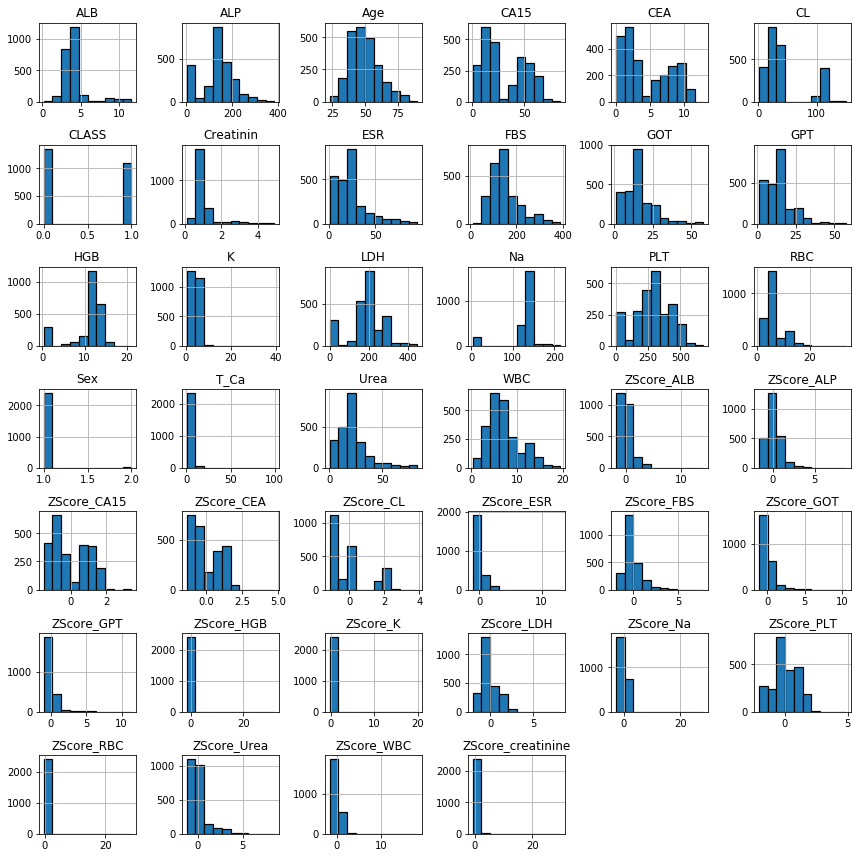

In [27]:
BC.hist(figsize=(12,12), edgecolor='black', linewidth=1.2)
plt.tight_layout( True )
plt.show()

In [28]:
BC.drop(["ZScore_FBS","ZScore_Urea","ZScore_creatinine","ZScore_ALB","ZScore_GPT","ZScore_GOT","ZScore_ALP",
        "ZScore_CA15","ZScore_CEA","ZScore_WBC","ZScore_RBC","ZScore_HGB","ZScore_PLT","ZScore_ESR","ZScore_LDH",
        "ZScore_Na","ZScore_CL","ZScore_K"],axis=1,inplace=True)

In [29]:
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.00000,23.0,0.8,3.400000,1.0,2.000000,1.0,...,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,154.36173,22.0,0.7,4.461508,9.6,3.000000,7.0,...,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,154.36173,27.0,0.6,3.500000,9.3,11.000000,17.0,...,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.00000,15.0,1.1,4.200000,8.5,13.000000,1.0,...,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.00000,2.0,1.0,3.000000,8.0,7.000000,13.0,...,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.00000,28.0,0.7,5.900000,9.5,13.882247,23.0,...,3.9,5.23,11.3,288.000000,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.00000,32.0,0.8,10.200000,8.8,13.882247,23.0,...,4.8,4.57,13.2,249.000000,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.00000,15.0,0.6,11.400000,8.1,22.000000,15.0,...,4.4,4.32,11.1,249.000000,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.00000,29.0,0.9,10.900000,8.2,51.000000,17.0,...,4.5,4.41,12.9,293.000000,13.0,254.0,147.5,3.15,107.5,1


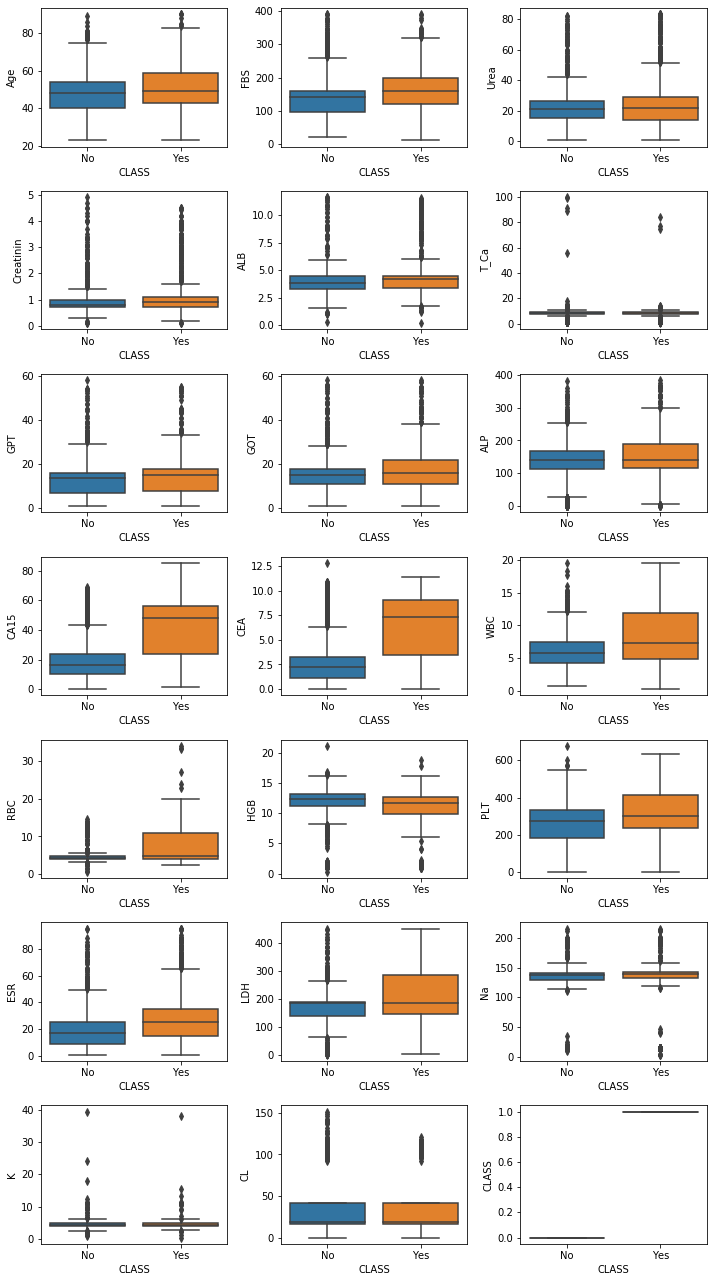

In [30]:
temp = BC[['Age','FBS','Urea','Creatinin','ALB','T_Ca','GPT','GOT','ALP','CA15','CEA',
                'WBC','RBC','HGB','PLT','ESR','LDH','Na','K','CL','CLASS']]
plt.figure(figsize=(10,20))
for i in range(21):
    plt.subplot(8,3,i+1)# لان عدد الخصائص المطلوبه 24 عنصر نقسمها
    plt.grid( False )
    sns.boxplot(x='CLASS', y=temp.columns[ i ], data=temp)
    plt.xticks([0,1],['No','Yes'], rotation=0 )
plt.tight_layout( True )
plt.show()

## Correlation Analysis

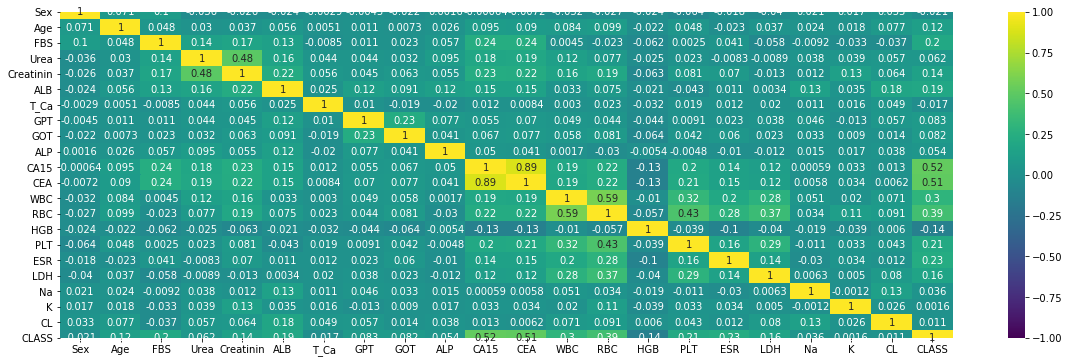

In [31]:
plt.figure(figsize=(20,6))
sns.heatmap(BC.corr(),annot=True,center=0, cmap='viridis',vmin=-1,
    vmax=1)

In [32]:
mask=np.zeros_like(BC.corr())
triangle_indices= np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,

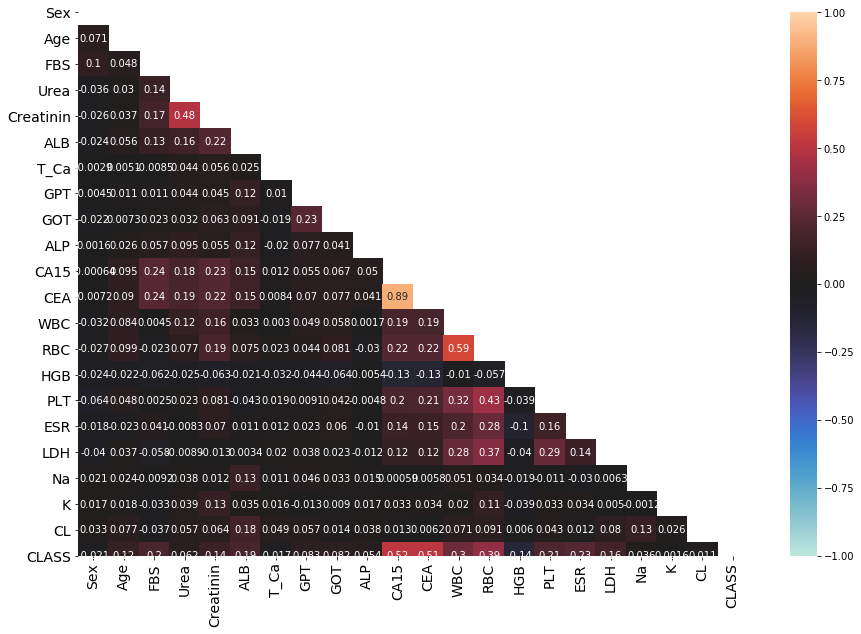

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(BC.corr(),mask=mask,annot=True,center=0, vmin=-1,
    vmax=1)

BC.corr()

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()



## The best 10 features by Correlation Analysis

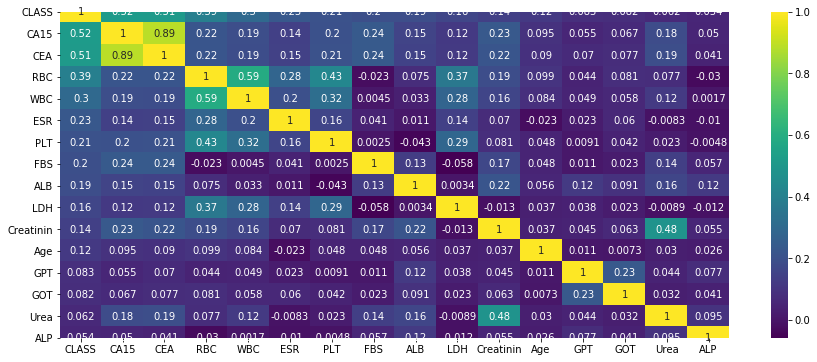

In [34]:
k = 16 #number of variables for heatmap
cols = BC.corr().nlargest(k, 'CLASS')['CLASS'].index
cm = BC[cols].corr()
plt.figure(figsize=(15,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

## Outier investigation

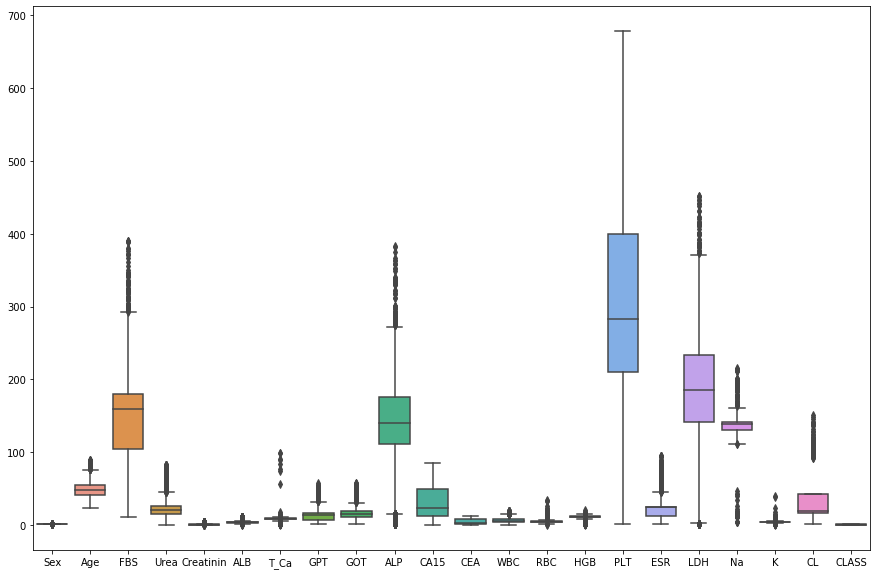

In [35]:
plt.figure(figsize=(15,10))
sns.boxplot(data=BC)


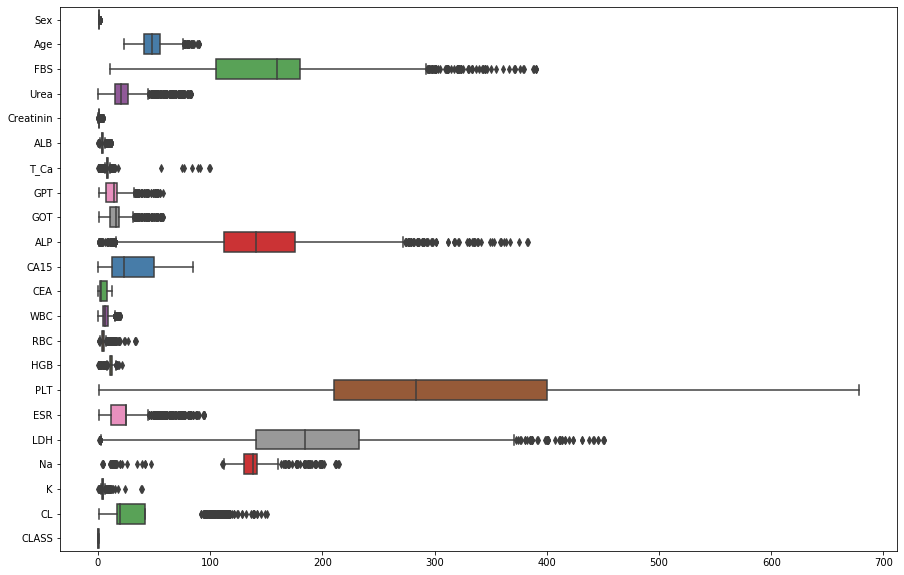

In [36]:
plt.figure(figsize=(15,10))
sns.boxplot(data=BC,orient="h", palette="Set1")


## Let's now investigate more closely the distributions of these features separately for the two classes using Crosstabs:

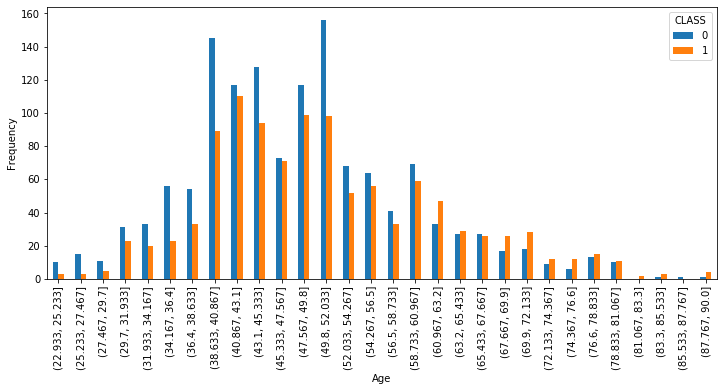

In [37]:
p.crosstab( p.cut(BC.Age,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

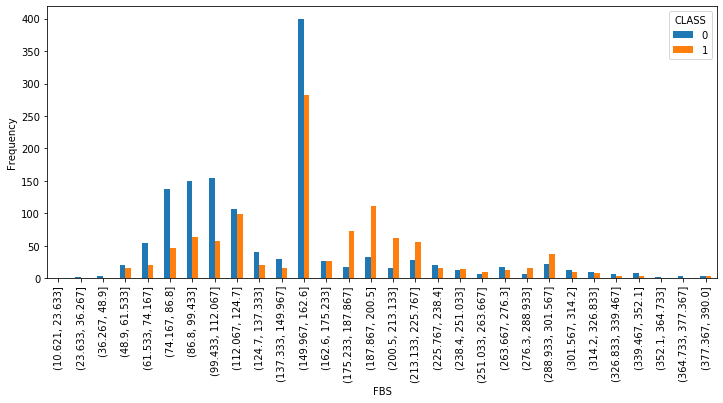

In [38]:
p.crosstab( p.cut(BC.FBS,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

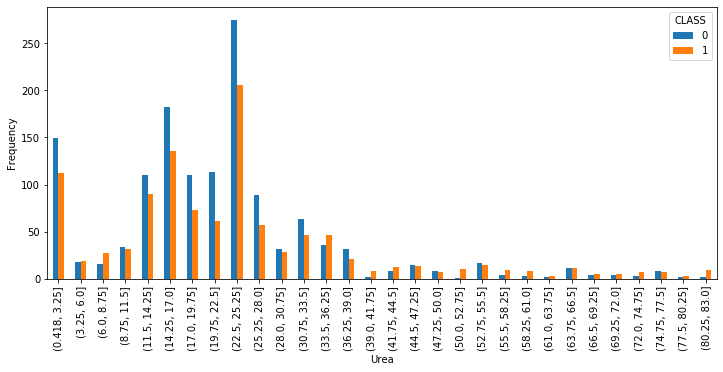

In [39]:
p.crosstab( p.cut(BC.Urea,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

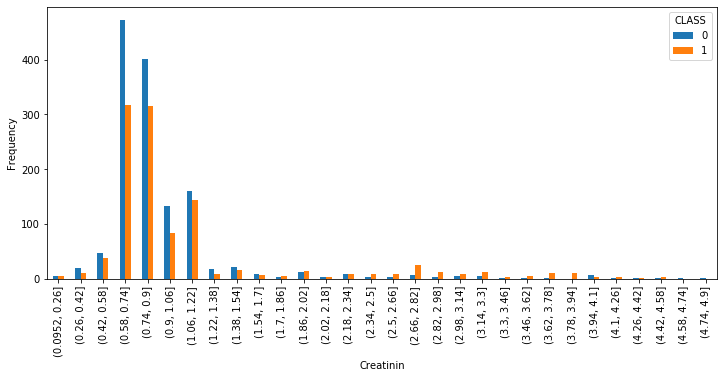

In [40]:
p.crosstab( p.cut(BC.Creatinin,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

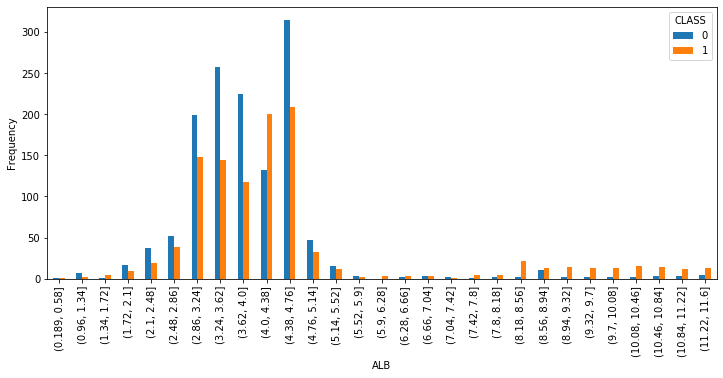

In [41]:
p.crosstab( p.cut(BC.ALB,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

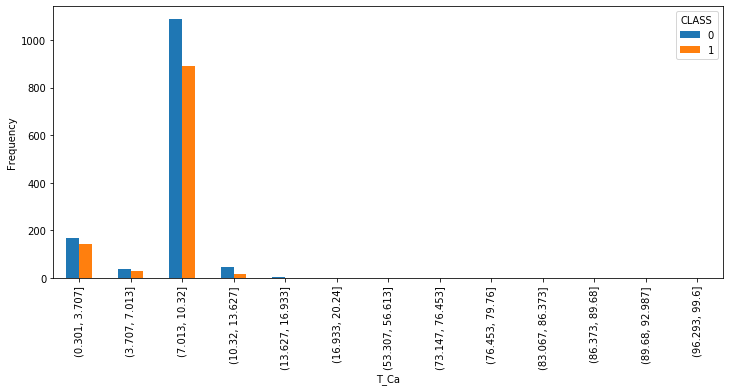

In [42]:
p.crosstab( p.cut(BC.T_Ca,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

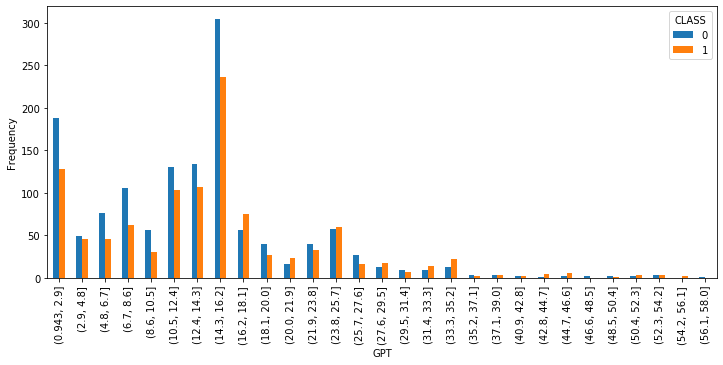

In [43]:
p.crosstab( p.cut(BC.GPT,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

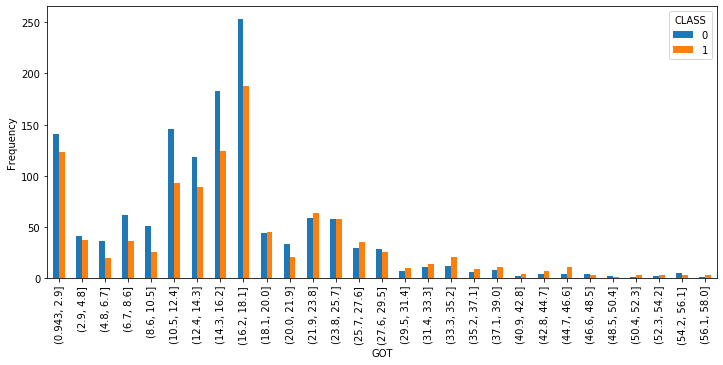

In [44]:
p.crosstab( p.cut(BC.GOT,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

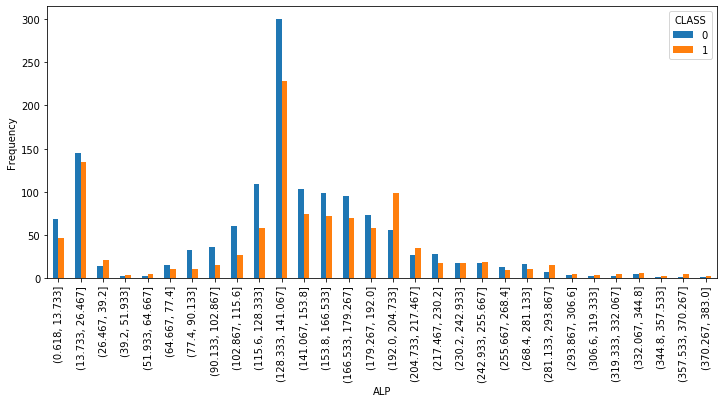

In [45]:
p.crosstab( p.cut(BC.ALP,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

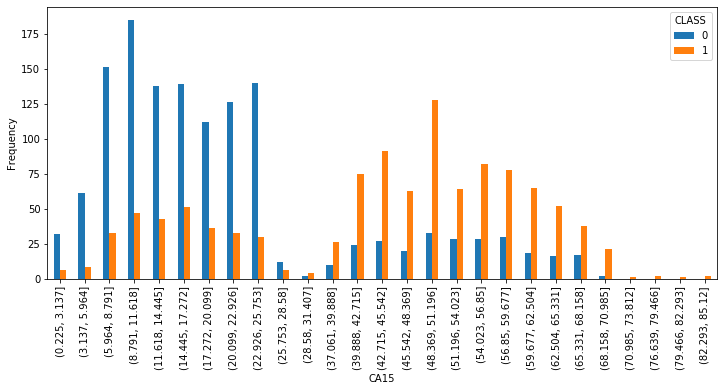

In [46]:
CA=BC['CA15']
p.crosstab( p.cut(CA,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

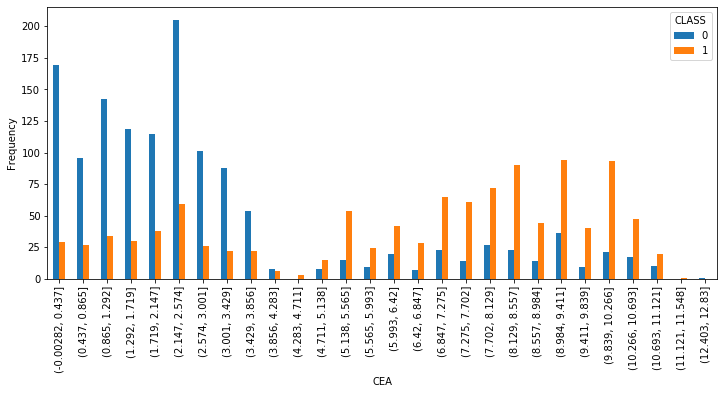

In [47]:
p.crosstab( p.cut(BC.CEA,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

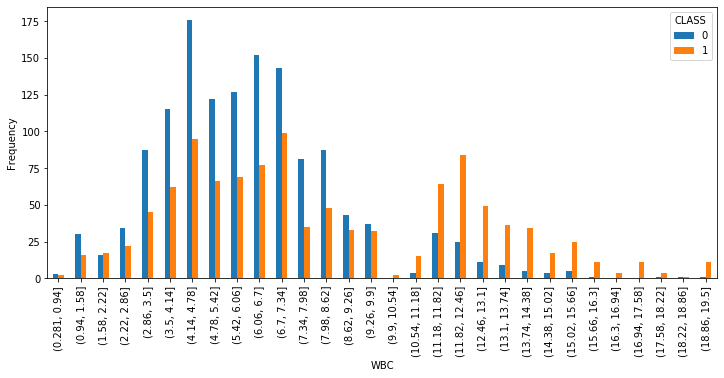

In [48]:
p.crosstab( p.cut(BC.WBC,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

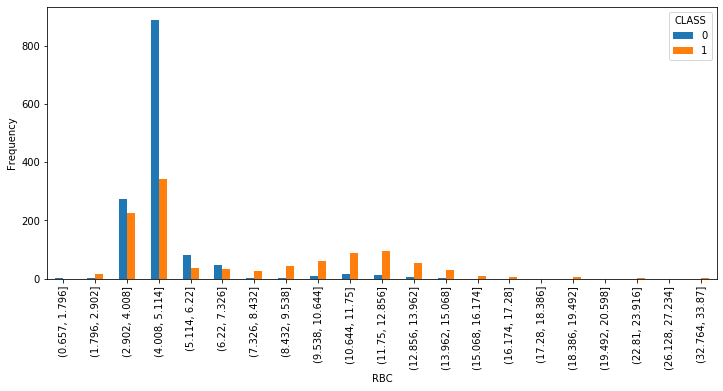

In [49]:
p.crosstab( p.cut(BC.RBC,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

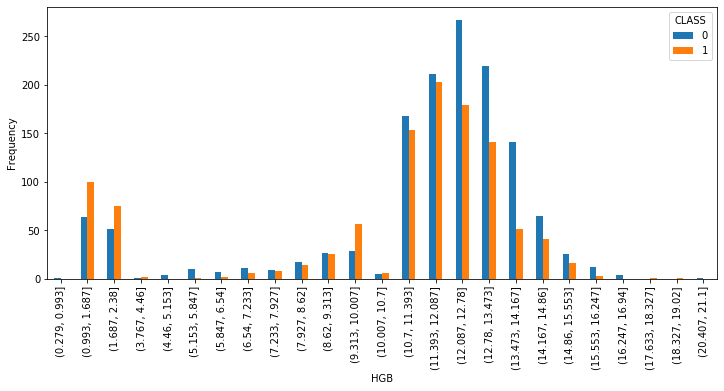

In [50]:
p.crosstab( p.cut(BC.HGB,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

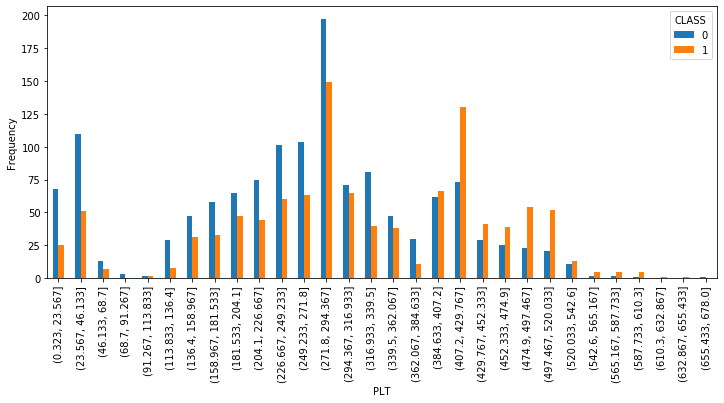

In [51]:
p.crosstab( p.cut(BC.PLT,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

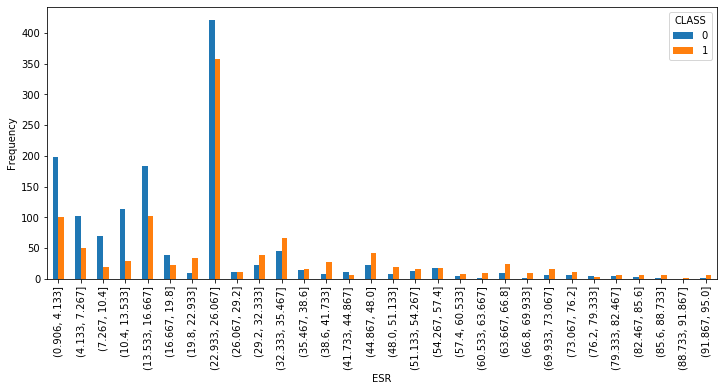

In [52]:
p.crosstab( p.cut(BC.ESR,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

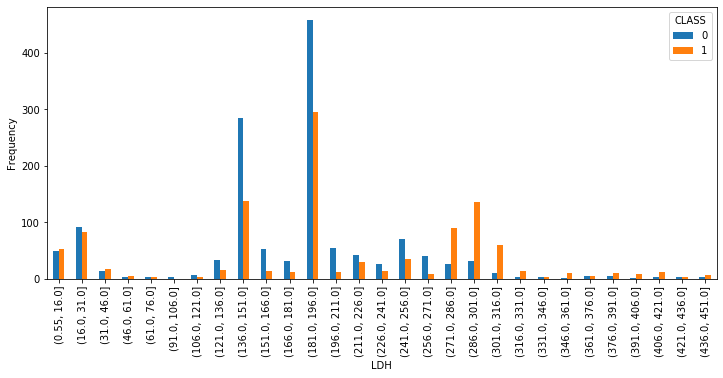

In [53]:
p.crosstab( p.cut(BC.LDH,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

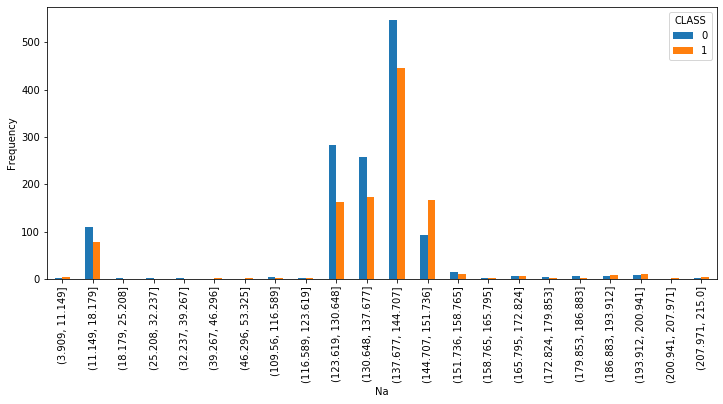

In [54]:
p.crosstab( p.cut(BC.Na,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

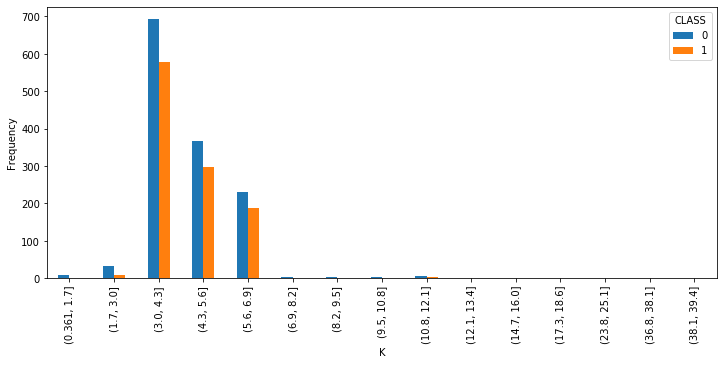

In [55]:
p.crosstab( p.cut(BC.K,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

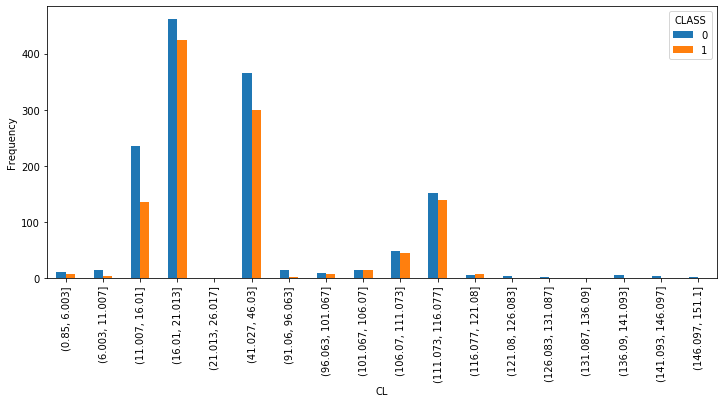

In [56]:
p.crosstab( p.cut(BC.CL,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = BC.columns.tolist()
for column in cols:
    if BC[column].dtype == 'object':
        BC[column] = le.fit_transform(BC[column])


In [58]:
X=BC.drop(["CLASS"],axis=1)
y=BC["CLASS"]  

In [59]:
from sklearn.model_selection import train_test_split 

## spilt
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=0) 


In [60]:
## قبل الضبط البارميترات

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(X_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [61]:
y_pred=D_classifier.predict_proba(X_test)[:,1]
new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

In [62]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8786885245901639

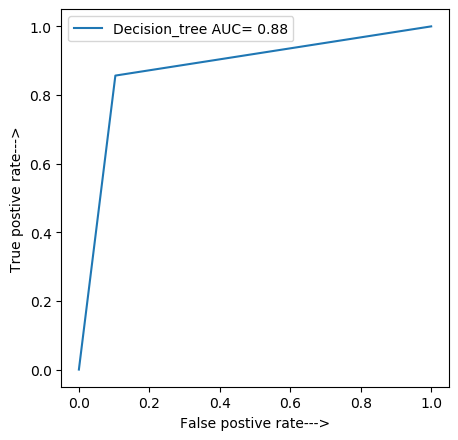

In [63]:
## AUC RUC
from sklearn.metrics import roc_curve,auc

dec_fpr,dec_tpr,threshold=roc_curve(y_test,new_y)
auc_dec=auc(dec_fpr,dec_tpr)

plt.figure(figsize=(5,5),dpi=100)
plt.plot(dec_fpr,dec_tpr,linestyle='-',label='Decision_tree AUC=% 0.2f' % auc_dec)

plt.xlabel('False postive rate--->')
plt.ylabel('True postive rate--->')

plt.legend()
plt.show()


In [64]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,new_y,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,new_y,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)

mean_absolute_error is = 0.12131147540983607
mean_squared_error is = 0.3482979692875571


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8786885245901639
[[303  35]
 [ 39 233]]


Text(33.0, 0.5, 'Acutl')

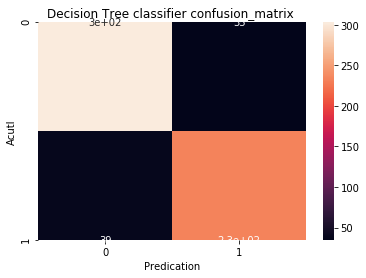

In [65]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(X_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [66]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(X_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       338
           1       0.87      0.86      0.86       272

    accuracy                           0.88       610
   macro avg       0.88      0.88      0.88       610
weighted avg       0.88      0.88      0.88       610

accuracy_score= 0.8786885245901639
